In [1]:
import numpy as np, plottools as pl, camb
from matplotlib.pyplot import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
lmax = 2550
l = np.linspace(0,lmax,lmax+1)

In [3]:
# Reset CAMB
# https://wiki.cosmos.esa.int/planck-legacy-archive/index.php/Simulation_data
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.01904, ombh2=0.02216571, omch2=0.1202944, mnu=0.06, omk=0, tau=0.06018107)
pars.InitPower.set_params(As=2.119631e-9, ns=0.9636852, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);
results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


In [4]:
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
lensedCL=powers['lensed_scalar']

In [5]:
uTT = unlensedCL[:,0]
uEE = unlensedCL[:,1]
uTE = unlensedCL[:,3]
uPP = powers['lens_potential'][:,0]

In [6]:
lTT = lensedCL[:,0]
lEE = lensedCL[:,1]
lBB = lensedCL[:,2]
lTE = lensedCL[:,3]

In [7]:
np.savetxt('../data/local/sim_ucl.dat',np.array((l,uTT,uTE,uEE,uPP)).T)
np.savetxt('../data/local/sim_lcl.dat',np.array((l,lTT,lTE,lEE,lBB,uPP)).T)

(2551, 4)


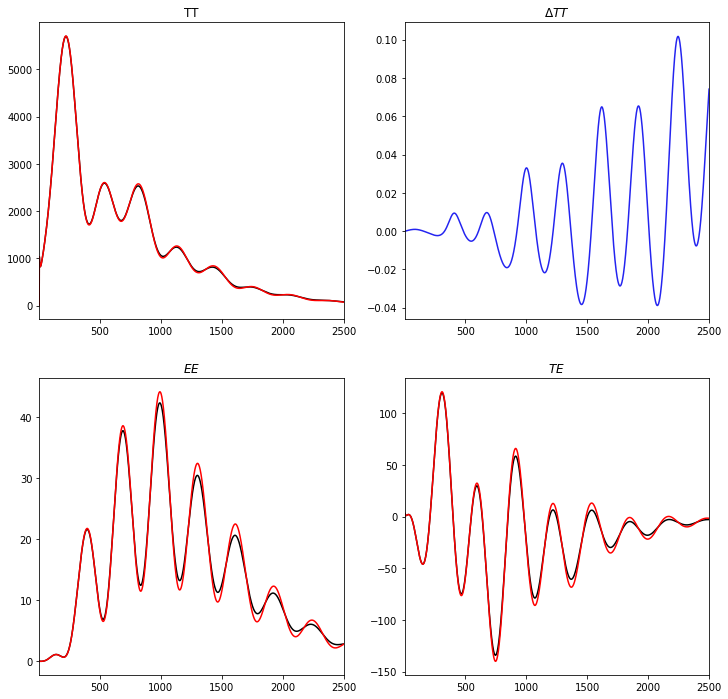

In [8]:
#plot the total lensed CMB power spectra versus unlensed, and fractional difference
print(totCL.shape)
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
ls = np.arange(totCL.shape[0])
fig, ax = subplots(2,2, figsize = (12,12))
ax[0,0].plot(ls,totCL[:,0], color='k')
ax[0,0].plot(ls,unlensedCL[:,0], color='r')
ax[0,0].set_title('TT')
ax[0,1].plot(ls[2:], 1-unlensedCL[2:,0]/totCL[2:,0]);
ax[0,1].set_title(r'$\Delta TT$')
ax[1,0].plot(ls,totCL[:,1], color='k')
ax[1,0].plot(ls,unlensedCL[:,1], color='r')
ax[1,0].set_title(r'$EE$')
ax[1,1].plot(ls,totCL[:,3], color='k')
ax[1,1].plot(ls,unlensedCL[:,3], color='r')
ax[1,1].set_title(r'$TE$');
for ax in ax.reshape(-1): ax.set_xlim([2,2500]);